In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-csv/insurance.csv


In [2]:
#importing the dataset
df = pd.read_csv("/kaggle/input/insurance-csv/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Data Sanity Checks

In [3]:
df.shape

(1338, 7)

In [4]:
df.duplicated().sum()

1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


### Data Cleaning

In [8]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [9]:
num = df.select_dtypes(include = "number")
num

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [10]:
corel = num.corr()
corel

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


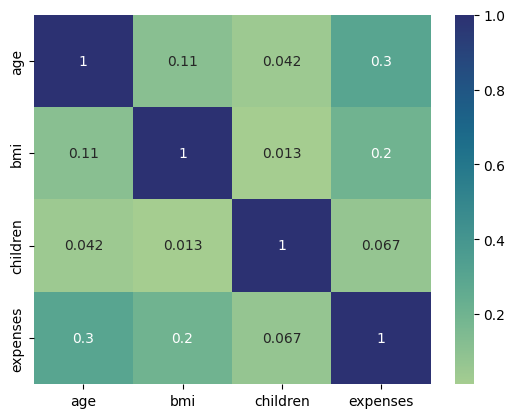

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corel, cmap = 'crest', annot = True)
plt.show()

### Encoding Categorical Variables

In [12]:
df.describe(include = "object").T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
#encoding
le = LabelEncoder()
df['sex']= le.fit_transform(df['sex'])
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [15]:
df['smoker'] = le.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [16]:
dfm = pd.get_dummies(df['region'], drop_first = True, prefix = 'region').astype(int)
dfm

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [17]:
region = df[df['region'] == 'northeast']
region

,age,sex,bmi,children,smoker,region,expenses
8,37,1,29.8,2,0,northeast,6406.41
10,25,1,26.2,0,0,northeast,2721.32
16,52,0,30.8,1,0,northeast,10797.34
17,23,1,23.8,0,0,northeast,2395.17
20,60,0,36.0,0,0,northeast,13228.85
...,...,...,...,...,...,...,...
1321,62,1,26.7,0,1,northeast,28101.33
1325,61,1,33.5,0,0,northeast,13143.34
1326,42,0,32.9,0,0,northeast,7050.02
1328,23,0,24.2,2,0,northeast,22395.74


In [18]:
dfm.head(9)

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,0


In [19]:
df.drop(['region'], axis = 1, inplace = True)
df1 = pd.concat([df, dfm], axis = 1)
df1

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,1,0,0
1334,18,0,31.9,0,0,2205.98,0,0,0
1335,18,0,36.9,0,0,1629.83,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,1


In [20]:
#defining the dependent and independent variables
X = df1.drop(['expenses'], axis = 1)
y = df1['expenses']
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,0,0,1
1,18,1,33.8,1,0,0,1,0
2,28,1,33.0,3,0,0,1,0
3,33,1,22.7,0,0,1,0,0
4,32,1,28.9,0,0,1,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#splitting the data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [23]:
#scaling the data
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,1.489407,0.962354,0.412047,1.585550,-0.532272,-0.556820,1.642852,-0.568348
1,1.489407,-1.039118,-1.102884,-0.920541,-0.532272,1.795911,-0.608698,-0.568348
2,0.631515,-1.039118,-0.536865,-0.085177,-0.532272,-0.556820,-0.608698,-0.568348
3,-1.441724,0.962354,0.711704,-0.920541,1.878739,-0.556820,-0.608698,1.759484
4,-1.441724,-1.039118,-0.287152,-0.920541,1.878739,1.795911,-0.608698,-0.568348


In [26]:
#modelling the data
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Linear Regressor

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
preds = lr.predict(X_test)

In [29]:
res = mean_squared_error(y_test, preds)
res

32371746.770593215

In [30]:
r_res = r2_score(y_test, preds)
r_res

0.7497542586092725

### Decision Tree

In [31]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
pred_tree = dtree.predict(X_test)

In [33]:
res_tree = mean_squared_error(y_test, pred_tree)
res_tree

49021258.589705594

In [34]:
rr_tree = r2_score(y_test, pred_tree)
rr_tree

0.6210472889639918

### Random Forest

In [35]:
rfor = RandomForestRegressor()
rfor.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
pred_ran = rfor.predict(X_test)

In [37]:
rand_res = mean_squared_error(y_test, pred_ran)
rand_res

22374389.18317605